Previously, I extracted data t.hat overlapped both temporally and (approximately) spatially the stranding data. This notebook documents a more in-depth exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb
import os
from matplotlib import rcParams

In [3]:
sb.reset_defaults()
rcParams['font.size'] = 16
rcParams['axes.formatter.limits'] = (-2,4)
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['figure.figsize'] = (10,5)
sb.set_style('darkgrid')

In [4]:
%matplotlib inline

In [5]:
dataMain = '/home/madhatter106/DATA/Beaching_Project/CapeCodData/PklJar/'

In [6]:
dataReSave = '../PklJar/'

In [7]:
fn = 'dfCensusCapeCodLagenorhyncus.pkl'

In [8]:
fp = os.path.join(dataMain, fn)

In [9]:
dfcens = pd.read_pickle(fp)

In [10]:
dfcens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
index        1056 non-null int64
row_id       1056 non-null object
latitude     1056 non-null float64
longitude    1056 non-null float64
date_time    1056 non-null datetime64[ns]
count        1056 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 49.6+ KB


In [11]:
dfcens.head()

,index,row_id,latitude,longitude,date_time,count
0,13,513_1555,42.5245,-69.910000,1999-03-21 10:35:40,9.0
1,434,513_1643,42.3685,-70.120667,1999-03-26 11:02:25,4.0
2,435,513_1644,42.3680,-70.091500,1999-03-26 11:03:09,6.0
3,679,513_1652,42.4525,-70.535667,1999-03-26 11:48:23,4.0
4,2447,513_82100,42.5330,-69.798667,1999-03-26 12:20:42,2.0


In [12]:
dfcens.sort_values(by='date_time', inplace=True)
dfcens.set_index('date_time', inplace=True)

In [13]:
dfcens.meta={'scientific':'Lagenorhynchus acutus',
             'common': 'Atlantic White-sided Dolphin'}

In [ ]:
dfcens.drop(['scientific', 'common'], axis=1, inplace=True)

In [26]:
dfcens.to_pickle(os.path.join(dataReSave, fn))

In [15]:
dfcens.head()

,index,row_id,latitude,longitude,count
date_time,,,,,
1999-03-21 10:35:40,13,513_1555,42.5245,-69.910000,9.0
1999-03-26 11:02:25,434,513_1643,42.3685,-70.120667,4.0
1999-03-26 11:03:09,435,513_1644,42.3680,-70.091500,6.0
1999-03-26 11:48:23,679,513_1652,42.4525,-70.535667,4.0
1999-03-26 12:20:42,2447,513_82100,42.5330,-69.798667,2.0


In [16]:
dfcens.drop('index', axis=1, inplace=True)

In [23]:
fpD = os.path.join(dataReSave, fn.split('.')[0] + '_day.pkl')

In [17]:
fpm = os.path.join(dataReSave,fn.split('.')[0] + '_month.pkl')

In [24]:
dfday = dfcens.resample('D').sum()

In [18]:
dfmo = dfcens.resample('M').sum()

In [31]:
dfmo.to_pickle(fpm)

In [22]:
dfmo['count'].replace(to_replace=np.NaN, value=0, inplace=True)

In [35]:
dfday.to_pickle(fpD)

In [ ]:
dfday['count'].replace(to_replace=np.NaN, value=0, inplace=True)
dfday.rename(columns={'count':'lageno_cnsus'},inplace=True)

In [38]:
dfday.

,latitude,longitude,lageno_cnsus
date_time,,,
1999-03-21,42.5245,-69.91,9.0
1999-03-22,NaN,NaN,0.0
1999-03-23,NaN,NaN,0.0
1999-03-24,NaN,NaN,0.0
1999-03-25,NaN,NaN,0.0


In [34]:
dfcens.loc['2010-05-01']

,row_id,latitude,longitude,count
date_time,,,,
2010-05-01 10:43:38,513_40065,42.10023,-69.36401,60.0
2010-05-01 13:52:02,513_40335,41.80502,-69.67383,250.0
2010-05-01 13:52:24,513_78992,41.80109,-69.68641,100.0
2010-05-01 13:52:44,513_40337,41.79709,-69.69813,300.0
2010-05-01 13:53:08,513_40341,41.79028,-69.71050,1500.0
2010-05-01 13:53:10,513_77294,41.78965,-69.71143,500.0
2010-05-01 16:49:12,513_40606,41.74255,-69.10753,10.0


In [33]:
dfday.loc[dfday['count']==dfday['count'].max()]

,latitude,longitude,count
date_time,,,
2010-05-01,292.82591,-486.95184,2720.0


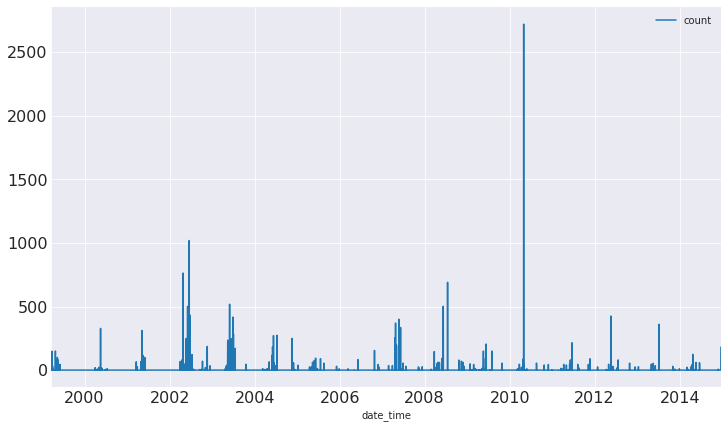

In [30]:
dfday.plot(y='count', figsize=(12,7), )

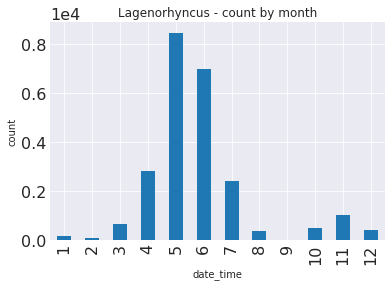

In [19]:
gp = dfmo.groupby(by=dfmo.index.month)
ax = gp['count'].sum().plot(kind='bar');
ax.set_title('Lagenorhyncus - count by month')
ax.set_ylabel('count');

In [20]:
dfy = dfmo.resample('A').sum()

In [21]:
dfy.index.year

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='date_time')

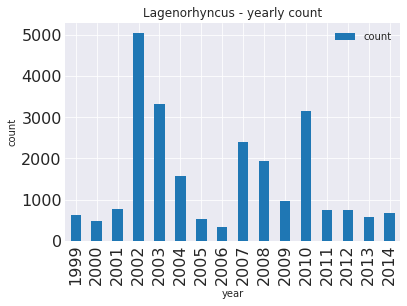

In [22]:
ax = dfy.plot(x=dfy.index.year,y='count', kind='bar');
ax.set_xlabel('year'), ax.set_ylabel('count');
ax.set_title('Lagenorhyncus - yearly count');